# 减去背景
首先通过读取图像获取平均背景，然后通过对每张图像减去平均背景得到，看是否能够得到清晰的液滴

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import os
import glob

%matplotlib inline

In [2]:
# os.chdir("..")

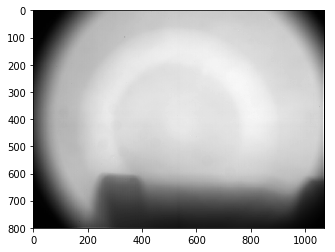

In [3]:
# fig = plt.figure()
# 获取平均背景 bgimg_gray
ims = []
cal = []
cal_gray = []
paths = glob.glob('data/600V350Q401/*.jpg')
step = 1
image = cv.imread(paths[0])
bgimg_gray = np.zeros((800, 1072))
# print(type(bgimg_gray))
# print(bgimg_gray.shape)
for index, f in zip(range(len(paths)-1), paths[::step]):
    if index >= step + 1000:
        bgimg_gray /= index
        break
    image = cv.imread(f)
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    image_gray = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
#     print(type(image_gray))
#     print(image_gray.shape)
#     cal.append([image])
#     cal_gray.append([image_gray])
#     nps=sum(cal)
#     mean=nps/len(cal)
#     bgimg = np.mean(cal)
#     nps_gray = sum(cal_gray)
#     mean_gray = nps_gray / len(cal_gray)
#     bgimg_gray = np.mean(cal_gray)
    bgimg_gray = np.add(bgimg_gray, image_gray)
#     print(bgimg_gray)
#     bgimg_gray = cv.addWeighted(bgimg_gray, 0.5, image_gray, 0.5, 0.0, dtype=1)
    
plt.imshow(bgimg_gray, cmap='gray')

# plt.show()

In [5]:
cv.imwrite('bg_gray1000.jpg',bgimg_gray)

True

In [6]:
image1 = cv.imread(paths[0])
image1 = cv.cvtColor(image1, cv.COLOR_BGR2GRAY)
image2 = cv.imread(paths[1])
image2 = cv.cvtColor(image2, cv.COLOR_BGR2GRAY)


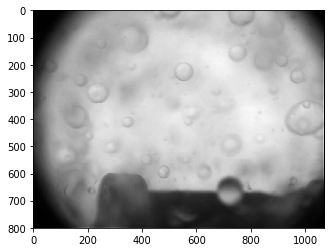

In [7]:
plt.imshow(image1,cmap='gray')

In [8]:
cv.imwrite('ori_gray.jpg',image1)

True

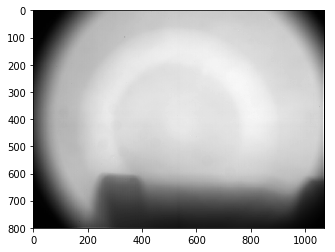

In [112]:
plt.imshow(bgimg_gray, cmap='gray')

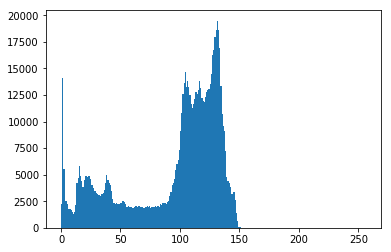

In [113]:
plt.hist(image1.ravel(),256,[0,256]); plt.show()

In [114]:
bgimg_gray.shape

(800, 1072)

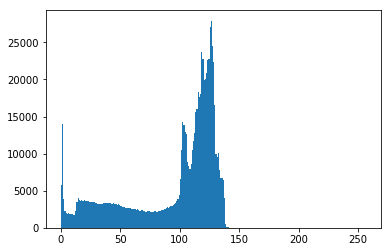

In [115]:
plt.hist(bgimg_gray.ravel(),256,[0,256]); plt.show()

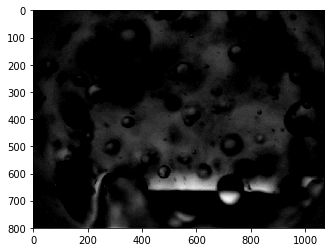

In [9]:
st = cv.subtract(image1, bgimg_gray, dtype=0)
plt.imshow(st, cmap='gray')

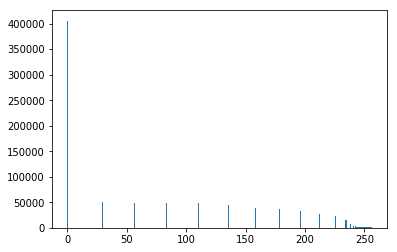

In [10]:
equ_st = cv.equalizeHist(st)
plt.hist(equ_st.ravel(),256,[0,256]); plt.show()

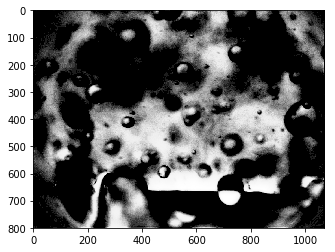

In [11]:
plt.imshow(equ_st,cmap='gray')

In [14]:
cv.imwrite('equ_st.jpg', equ_st)

True

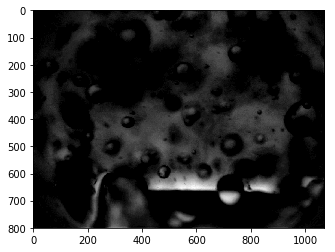

In [125]:
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_st = clahe.apply(st)
# clahe_clahe_v = clahe_v = clahe.apply(clahe_v)
plt.imshow(clahe_st, cmap='gray')

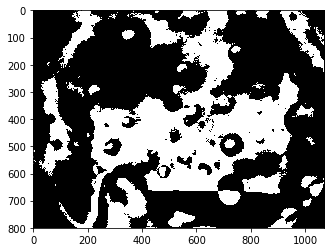

In [141]:
ret, threshold = cv.threshold(equ_st, 100, 255, cv.THRESH_BINARY)
plt.imshow(threshold, cmap='gray')

In [ ]:

image, contours, hierarchy = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print("contours size: ", len(contours))

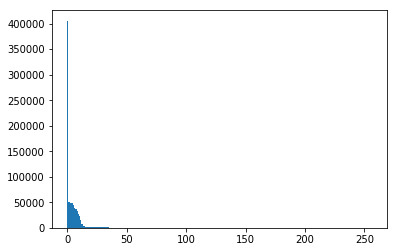

In [120]:
plt.hist(st.ravel(),256,[0,256]); plt.show()

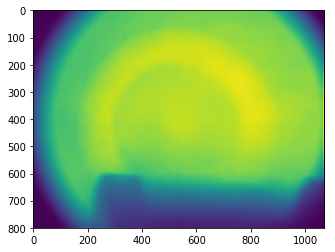

In [59]:
# plt.imshow(np.absolute(np.subtract(10*image1, bgimg_gray)))

In [65]:
st = bgimg_gray - image1

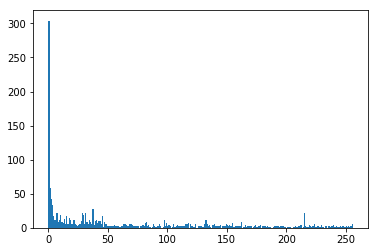

In [66]:
plt.hist(st.ravel(),256,[0,256]); plt.show()

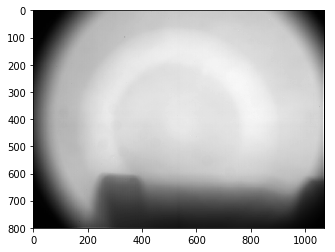

In [67]:
plt.imshow(st, cmap='gray')

In [83]:
st = bgimg_gray - image1
st[st <= 255] = 0  # 把小于20的像素点设为0

In [88]:
cv.imshow("bk", st)

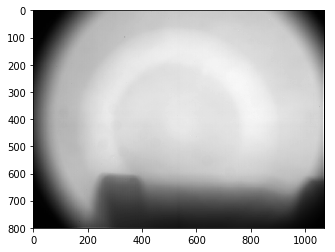

In [89]:
plt.imshow(st, cmap='gray')

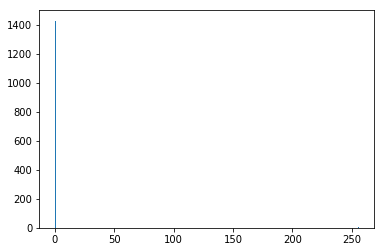

In [90]:
plt.hist(st.ravel(),256,[0,256]); plt.show()

In [60]:
## crop the rigion first
RIGION = (101,600, 151,850)
# print(RIGION)
st_crop = (image1 - bgimg_gray)[RIGION[0]:RIGION[1],RIGION[2]:RIGION[3]]

In [ ]:
cal=[cap.read()[1] for x in range(20)]
#mean 直接的加减是不行的
# bgimg0=np.mean(np.sum(cal))
# bgimg0=np.average(cal)
# bgimg0=np.mean(cal)
nps1=sum(cal)
mean1=nps1/len(cal)
# mean1[mean1<0]=0
# mean1[mean1>255]=255
cv2.imshow('bgimg', mean1)

'''

frame_no = 100
# cap.set(1, frame_no)#第10帧
ret, bgimg0 = cap.read()  # 背景
bgimg = cv2.cvtColor(bgimg0, cv2.COLOR_BGR2GRAY)
cv2.imshow('bgimg' + str(frame_no), bgimg0)
# cv2.imwrite('desk_bgimg.jpg',bgimg)

while cap.isOpened():
    ret, frame = cap.read()  # TODO 图像稳定
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    #
    st = cv2.subtract(gray, bgimg)
    # st = cv2.subtract(img1, img2)#相反
    # st[st <= 5] = 0  # 把小于20的像素点设为0

    ret, threshold = cv2.threshold(st, 50, 255, cv2.THRESH_BINARY)
    image, contours, hierarchy = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    print("contours size: ", len(contours))

    # img = cv2.drawContours(st, contours, -1, (0, 0, 0), 13)
    img = cv2.drawContours(st, contours, -1, (255, 255, 255), 3)
    #
    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area < 200:
            continue

        peri = cv2.arcLength(cnt, True)
        approx = cv2.approxPolyDP(cnt, 0.04 * peri, True)
        if len(approx) == 4:
            (x, y, w, h) = cv2.boundingRect(approx)
cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 2)